In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
data = pd.read_csv('train.csv')
data


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [36]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 111 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [37]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10,1000)

Iteration:  0
[4 4 7 ... 4 7 7] [3 3 9 ... 3 2 7]
0.07168292682926829
Iteration:  111
[6 3 7 ... 3 1 7] [3 3 9 ... 3 2 7]
0.5623658536585366
Iteration:  222
[6 3 7 ... 3 1 7] [3 3 9 ... 3 2 7]
0.7261219512195122
Iteration:  333
[6 3 7 ... 3 1 7] [3 3 9 ... 3 2 7]
0.7914390243902439
Iteration:  444
[6 3 9 ... 3 1 7] [3 3 9 ... 3 2 7]
0.8232195121951219
Iteration:  555
[2 3 9 ... 3 1 7] [3 3 9 ... 3 2 7]
0.8422926829268292
Iteration:  666
[2 3 9 ... 3 1 7] [3 3 9 ... 3 2 7]
0.8544390243902439
Iteration:  777
[2 3 9 ... 3 1 7] [3 3 9 ... 3 2 7]
0.8636585365853658
Iteration:  888
[2 3 9 ... 3 1 7] [3 3 9 ... 3 2 7]
0.8700975609756098
Iteration:  999
[2 3 9 ... 3 1 7] [3 3 9 ... 3 2 7]
0.8748048780487805


In [38]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.rcParams["figure.figsize"] = [1.00, 1.00]
    plt.imshow(current_image, interpolation='nearest',aspect=1)
    plt.show()

Prediction:  [3]
Label:  3


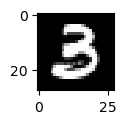

Prediction:  [9]
Label:  9


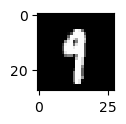

Prediction:  [0]
Label:  0


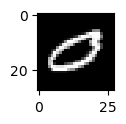

Prediction:  [2]
Label:  2


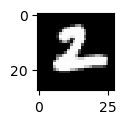

In [41]:
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)
test_prediction(4, W1, b1, W2, b2)

In [42]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[2 3 1 8 5 3 5 4 1 9 5 8 7 7 8 3 8 8 6 0 0 3 9 3 4 9 7 7 3 0 4 6 2 1 4 6 5
 1 4 2 6 8 5 9 2 7 3 1 4 0 8 0 3 0 6 9 0 3 7 6 6 6 6 8 2 8 7 2 8 2 2 2 3 6
 2 0 5 6 6 7 9 5 5 9 1 0 6 9 7 3 2 2 1 9 8 9 4 5 5 3 0 0 7 6 1 8 9 2 7 3 3
 8 0 9 7 6 4 1 4 3 1 5 7 3 0 3 6 7 8 8 6 6 5 5 9 1 3 9 0 7 7 1 4 0 2 2 8 9
 8 2 9 1 2 2 8 6 9 8 7 1 3 4 7 5 5 9 5 7 2 3 2 4 8 7 8 3 4 5 3 8 1 2 6 5 8
 3 4 3 5 0 3 3 0 9 4 2 2 7 8 7 1 2 6 1 1 9 7 1 1 8 2 1 7 3 9 5 8 2 6 4 8 5
 4 5 3 9 9 6 2 3 7 1 9 6 7 5 2 7 3 1 0 2 6 7 8 6 8 6 9 6 4 5 9 4 3 8 6 0 7
 0 5 8 7 1 7 4 2 0 4 1 2 1 8 5 2 5 6 5 8 5 3 3 7 7 2 8 3 2 6 4 4 5 8 1 2 4
 0 8 2 4 1 9 7 8 6 2 4 0 3 5 8 1 9 4 9 7 6 4 1 8 6 3 6 2 0 3 6 6 4 8 6 0 1
 8 3 2 6 3 3 7 1 2 9 8 7 3 0 1 9 3 4 3 9 3 7 8 4 5 2 9 6 0 4 7 1 8 5 5 0 4
 7 8 7 1 8 9 0 8 5 4 9 7 0 1 8 6 2 6 2 9 3 7 7 2 0 7 5 0 7 2 4 4 4 7 4 8 2
 7 0 0 7 0 1 9 6 1 9 0 9 4 5 1 2 0 9 2 6 6 2 3 6 1 3 2 3 1 4 7 3 4 5 6 5 7
 9 5 0 9 9 9 2 1 6 6 1 5 0 0 5 2 1 3 0 2 1 7 1 5 3 2 5 8 7 3 6 1 5 6 7 1 9
 1 1 8 2 4 2 5 3 1 6 0 8 

0.858